In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4

In [8]:
# define functions
def sph2cart(azimuth,elevation,r):
    rcoselev = r * np.cos(elevation)
    x = rcoselev * np.cos(azimuth)
    y = rcoselev * np.sin(azimuth)
    z = r * np.sin(elevation)
    return x, y, z

def rad2deg(angleInRadians):
    angleInDegrees = 180/np.pi * angleInRadians
    return angleInDegrees

def deg2rad(angleInDegrees):
    angleInRadians = np.pi/180 * angleInDegrees
    return angleInRadians

In [ ]:
# load netcdf
map_file = "O:\\HybridDune experiment\\2024-12-18 to 2024-12-20, Storm 1\Lidars\\20241220_LiDAR1\\storm1_lidar1_polar_10sInterval.nc"
i_t1= 0
i_window = 1800 # 180 point clouds = 1800s = 30min

ncid = nc4.Dataset(map_file,'r')
#print(ncid)  #uncomment to so info of netcdf
#for dim in ncid.dimensions.values():
    #print(dim)
print(ncid['radius_lidar'])

t_string = ncid.variables['time_string'][i_t1:i_t1+i_window]
radius_lidar   = ncid.variables['radius_lidar'][0:3,2,0:720,i_t1:i_t1+i_window]/1000 # echo 1-3, profile 3, angle 0-720, t ...
profile_angle  = ncid.variables['profile_angle'][2] # third profile
ini_beam_angle = ncid.variables['ini_beam_angle'][2] # third profile

radius_lidar.shape

<class 'netCDF4.Variable'>
uint16 radius_lidar(echos, profile_number, obs_number, time)
    _FillValue: 0
    long name: distance (radius) from lidar to point
    units: mm
    comment: radius, part of polar coordinates of points. Polar angles per point can be calculated from the profile_angle and ini_beam_angle
    dimensions: T x 720 x 16 x 3, for number of point clouds x (360°x0.5° angular resolution) x 16 profiles x 3 echos. The lidar registers at most 3 echos at each angle, usually less.
unlimited dimensions: 
current shape = (3, 16, 720, 15240)
filling on


(3, 720, 1800)

In [ ]:
# calculate profile angle. 
# The netcdf contains a single value for each of the 16 profiles, corresponding to the first point. Angular resolution of 0.5°, so every next point has an angle of 0.5° more 
angle_laserplane = profile_angle
angle_laserbeam  = ini_beam_angle + np.arange(0, 360, 0.5)
# angle_laserbeam = np.tile(angle_laserbeam,(radius_lidar.shape[2],1)).T # repeat (in the second dimension) for n_pointclouds (taken from the 3rd dim of radius_lidar)
   # use second line instead if a line is plotted for every cloud, instead of one line for the average

angle_laserbeam.shape



(720,)

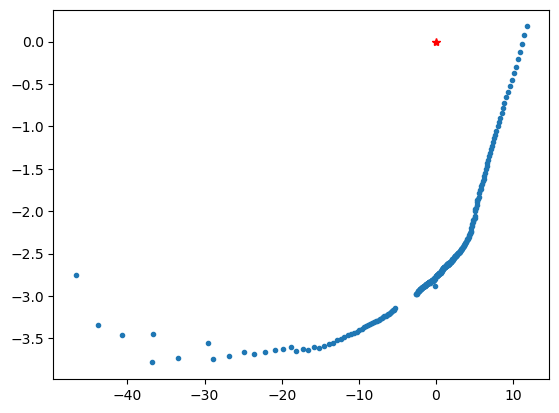

In [ ]:
# Determine max range, filter
# r_filtered = np.nanmax(radius_lidar,0) # max over echos, so largest distance if multiple echos measured
r_filtered = np.nanmax(radius_lidar,(0, 2)) # max over echos and time
r_filtered.shape

# filter regions
hoek_use_1 = -90  # dont plot angles between -180° and -90°
hoek_use_2 = 105  # dont plot angles between 105° and 180°
hoek_frame_skip =   np.array([[-17, -15.5],[-14, -11],[-2.5, -0.5]])  # skip the angles -17°to-15.5°; -14°to-11°and -2.5°to-0.5°: frame visible. (for some lines -13.5 and/or -11.5 would be enough)
                                                                      # NB: only checked for profiel 3 (recht vooruit), niet voor andere lijnen
x_skip_area = 6   # delete every point that is below x=6 and (simultaneously) above z=-1m.
z_skip_area = -1
x_plot_max = 12.5 # skip everything past x=12.5m, beyond dune crest (irrespective of z)
z_plot_max = 0.5  # skip everything above z=0.5m, above dune crest (irrespective of x)

# filter (in polar lidar coordinates) ----------------------------------------------
r_filtered.mask[angle_laserbeam<hoek_use_1]  = True # remove around lidar
r_filtered.mask[angle_laserbeam>hoek_use_2]  = True # remove around lidar

r_filtered.mask[ np.logical_and(angle_laserbeam>hoek_frame_skip[0,0], angle_laserbeam<hoek_frame_skip[0,1]) ] = True # remove around lidar
r_filtered.mask[ np.logical_and(angle_laserbeam>hoek_frame_skip[1,0], angle_laserbeam<hoek_frame_skip[1,1]) ] = True # remove around lidar
r_filtered.mask[ np.logical_and(angle_laserbeam>hoek_frame_skip[2,0], angle_laserbeam<hoek_frame_skip[2,1]) ] = True # remove around lidar

# convert to local x,y,z coordinates (rough) ----------------------------------------
[x_lidar,y_lidar,z_lidar] = sph2cart( deg2rad(angle_laserbeam), deg2rad(angle_laserplane), r_filtered ) # convert to cartesian xyz coordinates, in mm

# convert to local coordinates (rough). # to do: use gps allignment.
z_local = -x_lidar
x_local = y_lidar

# filter (in local coordinates) ----------------------------------------
z_local.mask[ np.logical_and(x_local<x_skip_area, z_local>z_skip_area)]  = True # remove around lidar
z_local.mask[ x_local > x_plot_max]  = True # remove beyond crest
z_local.mask[ z_local > z_plot_max]  = True # remove above crest

# Plot -------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(x_local, z_local,'.')
ax.plot(0,0,'*r')
# ax.grid(True)
plt.show()

In [ ]:
# trying code
a = 3
b = range(6)
#for n in b:
  #print(n) 

arr = np.array([ [1,2],[3,4],[5, np.nan],[7,8] ])
row_vec = np.arange(1, 3) # 1 to 2
col_vec = np.array( [[1], [2], [3]] )
row_vec3 = np.arange(1, 4) # 1 to 2

np.nanmax(arr,0)

array([7., 8.])

In [14]:
#[x_lidar,y_lidar,z_lidar] = sph2cart( deg2rad(angle_laserbeam), deg2rad(angle_laserplane), r_filtered ) # convert to xyz coordinates, in mm
radius_lidar.shape[2]
row_vec
a=n

NameError: name 'n' is not defined